In [167]:
execfile ("D:/measuring/analysis/scripts/setup_analysis.py")

import os, sys 
from os import listdir 
from os.path import isfile, join 
import numpy as np 
import matplotlib.pyplot as plt 
import h5py
from analysis.lib.tools import toolbox

from analysis.lib.fitting import fit, common

%matplotlib inline 



from analysis.lib.pq import pq_tools
reload(pq_tools)

<module 'analysis.lib.pq.pq_tools' from 'd:/measuring\analysis\lib\pq\pq_tools.pyc'>

In [237]:
folder=tb.latest_data('175518')
print folder
h5filepath = toolbox.measurement_filename(folder)
#h5mode=kw.get('hdf5_mode', 'r')
pqf = h5py.File(h5filepath,'r')

d:\measuring\data\20161012\175518_QTelecom_Tail_telecom


(<matplotlib.figure.Figure at 0x2437efb0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x2430c8f0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x24a57c30>))

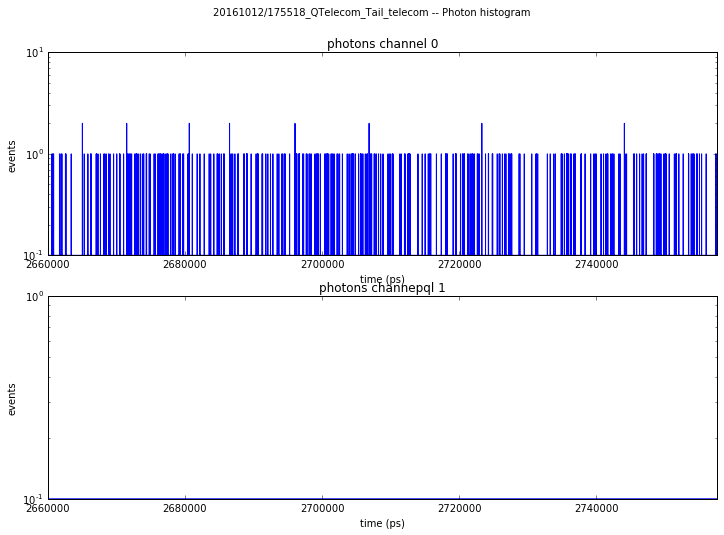

In [238]:
#pq_tools.get_photon_hist(pqf, start = 0, length = 3e6, hist_binsize = 10)
pq_tools.plot_photon_hist(pqf, start = 2.66e6, length = int(50e6/512.), hist_binsize = 10)

In [243]:
pq_binsize_ns = 1e-3
start_ns = 2768#660
hist_binsize_ns = 0.2
tail_length_ns = 30
reps = 13000*3
syncs_per_sweep = 250
sync_nrs=pqf['/PQ_sync_number-1'].value


sweep_pts = [0.1, 0.15833333, 0.21666667, 0.275, 0.33333333, 0.39166667, 0.45,0.50833333, 0.56666667, 0.625, 0.68333333, 0.74166667, 0.8]
is_ph = pq_tools.get_photons(pqf)[0]
sweep_length = len(sweep_pts)
sweep_idxs=np.mod(np.floor((sync_nrs-1)/syncs_per_sweep),sweep_length)
 
sync_time_ns = pqf['/PQ_sync_time-1'].value * pq_binsize_ns
hist_bins = np.arange(start_ns-hist_binsize_ns*.5,start_ns+1*tail_length_ns+hist_binsize_ns,hist_binsize_ns)
tail_hist_h=np.zeros((sweep_length,len(hist_bins)-1))

st_fltr = (start_ns  <= sync_time_ns) &  (sync_time_ns< (start_ns + tail_length_ns))
valid_tail_idxs = sweep_idxs[np.where(is_ph & st_fltr)]
tail_cts_per_sweep_idx=np.zeros(sweep_length)

for sweep_idx in range(sweep_length):
            tail_cts_per_sweep_idx[sweep_idx]= \
                                float(len(np.where(valid_tail_idxs==sweep_idx)[0])) / (reps*syncs_per_sweep/sweep_length)
            tail_hist_h[sweep_idx], tail_hist_b = \
                                np.histogram(sync_time_ns[np.where(is_ph & (sweep_idxs == sweep_idx))], bins=hist_bins)
                


print 'total_photons in channel', 0, ':', len(sync_time_ns[np.where(is_ph)])  
print 'total_photons in window:', len(sync_time_ns[np.where(is_ph & st_fltr)]) 
print 'total_sweeps in window:', len(valid_tail_idxs) 
print 'total ph in window with sweep element 0:', len(np.where(valid_tail_idxs==0)[0])
print 'div factor:', (reps*syncs_per_sweep/sweep_length)

total_photons in channel 0 : 6299
total_photons in window: 340
total_sweeps in window: 340
total ph in window with sweep element 0: 16
div factor: 750000


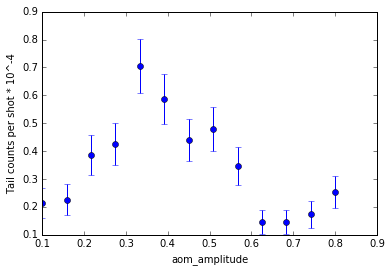

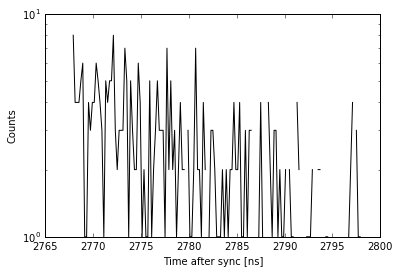

In [244]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)

y_err=np.sqrt(tail_cts_per_sweep_idx)/np.sqrt((reps*syncs_per_sweep/sweep_length))
ax.errorbar(sweep_pts, tail_cts_per_sweep_idx*1e4, fmt='o',yerr=y_err*1e4)
  
ax.set_xlabel('aom_amplitude')
ax.set_ylabel('Tail counts per shot * 10^-4')

log_plot = True
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)

xx=tail_hist_b[:-1]
yy=np.sum(tail_hist_h, axis=0)
if log_plot:
    ax.semilogy(xx,yy,'-', color = 'k')
else:
    ax.plot(xx,yy)
#ax.colorbar()
ax.set_xlabel('Time after sync [ns]')
ax.set_ylabel('Counts')


In [160]:
is_phot0, is_phot1 = pq_tools.get_photons(pqf)
sync_time = pqf['/PQ_sync_time-1'].value

_fltr0 = is_phot0
_fltr1 = is_phot1

st0 = sync_time[_fltr0]
st1 = sync_time[_fltr1]


print st0[:5]/1000
#fltr = pq_tools.filter_synctimes(pqf, )

[2689 2691 2699 2690 2692]


In [71]:
print valid_tail_idxs[:10]

[]


In [9]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
folder=tb.latest_data('red_tail')
#folder=tb.data_from_time('20140707172303')
#folder=r'D:\measuring\data\20140519\192030_Bell_lt3_tailS_The111no2_SIL1_Ey_+11deg'
name = 'ssro'
a = pqsequence.TailAnalysis(folder, hdf5_mode='r')#, pq_folder='bs_remote')
#a.fix_sweep_pts('Pulse Amplitude', 'eom_pulse_amplitude')
#a.get_sweep_pts()
a.sweep_pts = range(13)#a.g.attrs['aom_amplitude']
a.sweep_name=''
#a.get_sweep_idxs(noof_syncs_per_sweep_pt=250)
#a.get_readout_results(name)
a.get_tail_vs_sweep(0,5378,140, pq_binsize_ns=1e-3, hist_binsize_ns=0.1,verbose=True)
#a.get_tail_vs_sweep(0,5380.5,100, pq_binsize_ns=1, hist_binsize_ns=1,verbose=True)

KeyError: "Unable to open object (Object 'ssro' doesn't exist)"

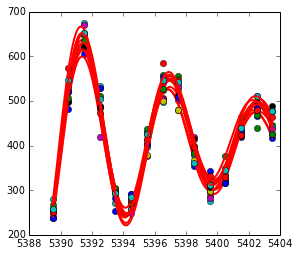

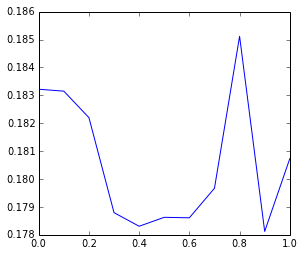

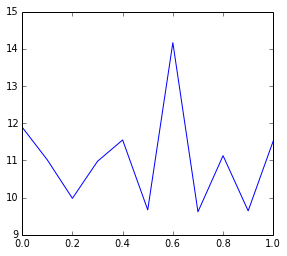

In [84]:
from analysis.lib.fitting import fit, common, rabi
from analysis.lib.tools import plot
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fs=zeros(a.sweep_length)
taus = zeros(a.sweep_length)
for i in range(a.sweep_length):
    x=a.tail_hist_b[:-1]        
    y=a.tail_hist_h[i]
    fit_result = fit.fit1d(x, y, rabi.fit_rabi_damped_exp_with_offset, 
            1/5.,1000,0,10., x[0], ret = True, color = 'r', linewidth = 2.0)
    fs[i] = fit_result['params_dict']['f']
    taus[i] = fit_result['params_dict']['tau']
    plot.plot_fit1d(fit_result, np.linspace(x[0],x[-1],201), ax=ax,
        plot_data=True, print_info=False)
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
#print taus, fs
ax.plot(a.sweep_pts, fs)
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ax.plot(a.sweep_pts, taus)


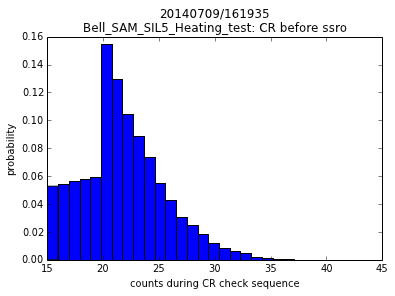

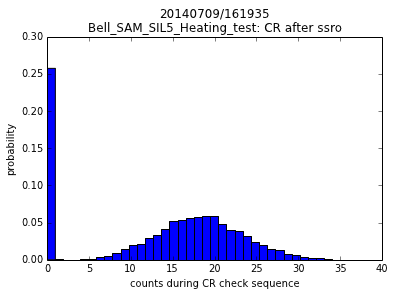

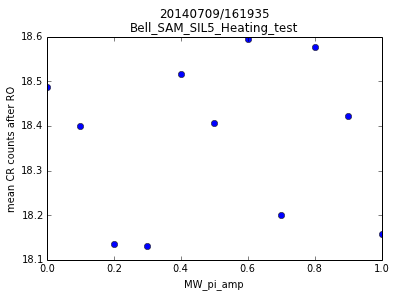

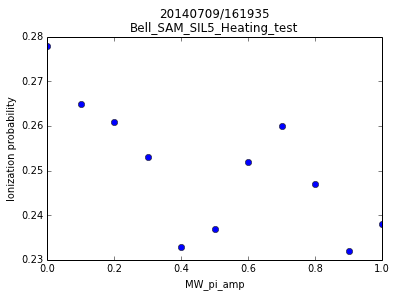

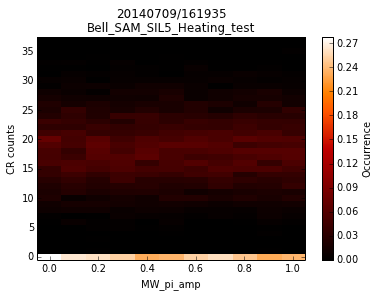

In [85]:
a.get_cr_results(name)
a.plot_cr_vs_sweep()

X:\data\20140709\170331_Bell_BS_tpqi_parallel_BS_SAM_SIL5_Tail_sweep_12deg\170331_Bell_BS_tpqi_parallel_BS_SAM_SIL5_Tail_sweep_12deg.hdf5
Total clicks: 3360


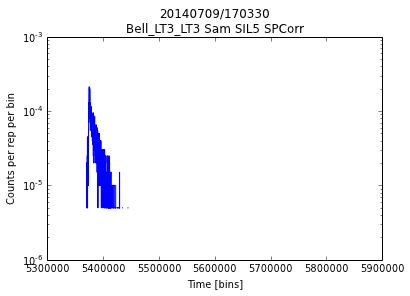

In [135]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
folder=tb.latest_data('Bell')
#folder=tb.data_from_time('20140609183154')
#folder=r'D:\measuring\data\20140519\192030_Bell_lt3_tailS_The111no2_SIL1_Ey_+11deg'
name = 'ssro'
a = pqsequence.TailAnalysis(folder, hdf5_mode='r', pq_folder='bs_remote')
a.reps=200000
a.plot_histogram(0,start=5.370e6, length=500000, hist_binsize=100, save=False, log_plot=False)

In [2]:
from analysis.lib.pq import pq_tools
reload(pq_tools)

ImportError: No module named analysis.lib.pq

In [122]:
fltr0=pq_tools.filter_synctimes(a.pqf, 5371.5e3, 5397e3,15,600e3)
fltr1=pq_tools.filter_synctimes(a.pqf, 5374e3, 5399.5e3,15,600e3)
cs=pq_tools.get_coincidences(a.pqf, fltr0, fltr1)
dts_ns = cs[:,0]*1e-3
len(cs)

6630

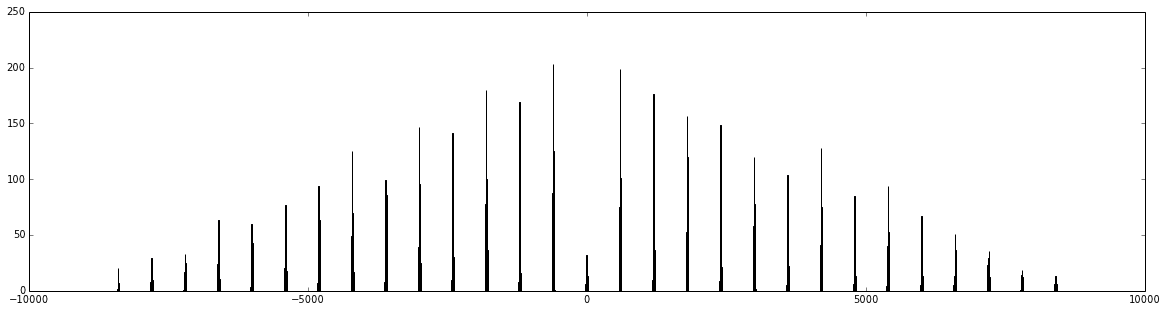

In [126]:
binsize=10
G2_BINEDGES = arange(-19000,19000,binsize)
#G2_BINEDGES = np.hstack((arange(-700,-500,binsize),arange(-100,100,binsize),arange(500,700,binsize)))
#print G2_BINEDGES
figure(figsize=(20,5))
b_=hist(dts_ns, bins=G2_BINEDGES)